In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.metrics import mean_squared_error,accuracy_score
from tqdm import tqdm_notebook

In [ ]:
from sklearn.datasets import make_blobs

# Outline

## GeneratingData

In [ ]:
data,labels=make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


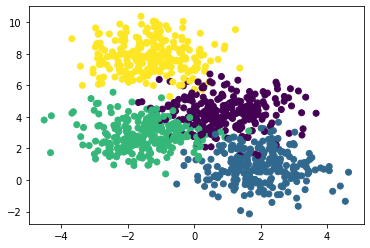

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [ ]:
data[:,1].shape

(1000,)

In [ ]:
labels_orig=labels
labels=np.mod(labels_orig,2)

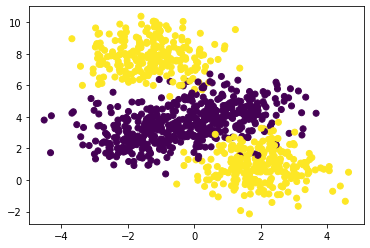

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels, random_state=0)

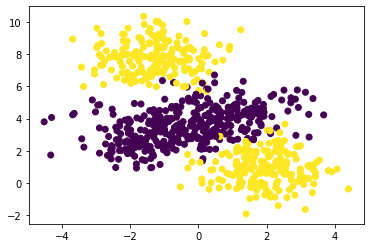

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

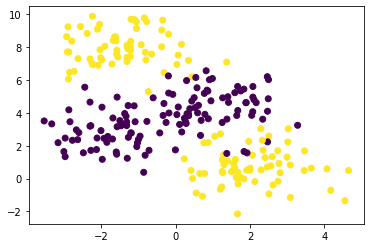

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

# Classification with sigmoid Neuron

In [ ]:
class sigmoid_neuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return fx*(1-fx)*(fx-y)*x
  def grad_b(self,x,y):
    fx=self.sigmoid(self.perceptron(x))
    return fx*(1-fx)*(fx-y)
  def fit(self,X,Y,epochs=1,lr=.5,initialise=True,display_loss=False):
    if(initialise):
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    if(display_loss):
      loss=[]
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
      dw=0
      db=0  
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=lr*dw/X.shape[1]
      self.b-=lr*db/X.shape[1]
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred,Y))
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('loss')
    return (self.w,self.b)
  def predict(self,X):
    Y_pred=[]
    for x in X:
      Y_pred.append(self.sigmoid(self.perceptron(x)))
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


(array([[ 3.14229133, -4.43282446]]), array([6.74653628]))

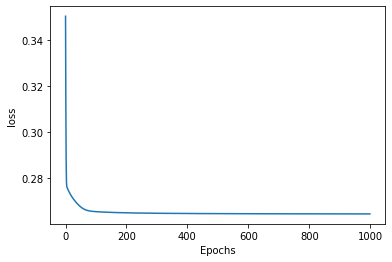

In [ ]:
sn=sigmoid_neuron()  
sn.fit(X_train,y_train,epochs=1000,lr=.1,display_loss=True)

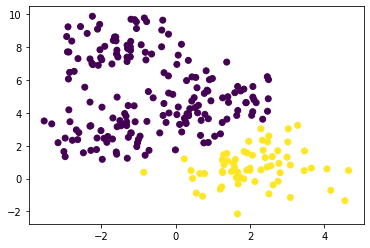

In [ ]:
y_pred_train=sn.predict(X_train)
Y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()
accuracy_score(y_train,Y_pred_binarised_train)
y_pred_test=sn.predict(X_test)
Y_pred_binarised_test=(y_pred_test>=0.5).astype("int").ravel()
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred_binarised_test)
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred_binarised_test,s=15*(np.abs(Y_pred_binarised_test-y_test)+.2))


In [ ]:
Y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()

In [ ]:
accuracy_score(y_train,Y_pred_binarised_train)

0.7346666666666667

In [ ]:
y_pred_test=sn.predict(X_test)

In [ ]:
Y_pred_binarised_test=(y_pred_test>=0.5).astype("int").ravel()

In [ ]:
accuracy_score(y_test,Y_pred_binarised_test)

0.716

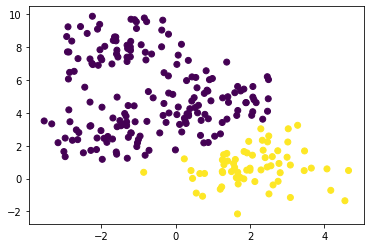

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred_binarised_test)

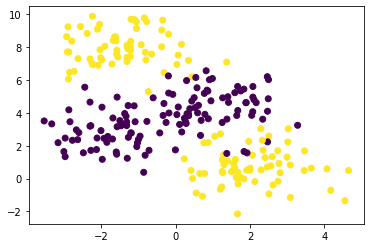

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

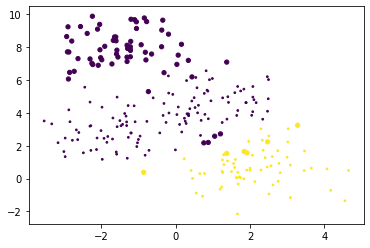

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=Y_pred_binarised_test,s=15*(np.abs(Y_pred_binarised_test-y_test)+.2))

# Classification with FF

## Our first Network

In [ ]:
class First_FF_Network:
  def __init__(self):
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
  def sigmoid(self,x):
    return (1.0/( 1.0+np.exp(-x) ))
  def forward_pass(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 =self.sigmoid(self.a1)
    self.a2=self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 =self.sigmoid(self.a2)
    self.a3=self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 =self.sigmoid(self.a3)
    return self.h3

  def grad(self,x,y):
    self.forward_pass(x)

    self.dw5=(self.h3-y)*self.h3*(1-self.h3)*self.h1
    self.dw6=(self.h3-y)*self.h3*(1-self.h3)*self.h2
    self.db3=(self.h3-y)*self.h3*(1-self.h3)

    self.dw1=(self.h3-y)* self.h3*(1-self.h3)* self.w5 * self.h1*(1-self.h1)*self.x1
    self.dw2=(self.h3-y)* self.h3*(1-self.h3)* self.w5 * self.h1*(1-self.h1)*self.x2
    self.db1=(self.h3-y)* self.h3*(1-self.h3)* self.w5 * self.h1*(1-self.h1)

    
    self.dw3=(self.h3-y)* self.h3*(1-self.h3)* self.w6 * self.h2*(1-self.h2)*self.x1
    self.dw4=(self.h3-y)* self.h3*(1-self.h3)* self.w6 * self.h2*(1-self.h2)*self.x2
    self.db2=(self.h3-y)* self.h3*(1-self.h3)* self.w6 * self.h2*(1-self.h2)

  def fit(self,X,Y,Epochs=1,lr=.25,initialise=True,display_loss=False):
    if(initialise):
      self.w1=np.random.randn()
      self.w2=np.random.randn()
      self.w3=np.random.randn()
      self.w4=np.random.randn()
      self.w5=np.random.randn()
      self.w6=np.random.randn()
      self.b1=0
      self.b2=0
      self.b3=0
    if(display_loss):
      loss=[]
    for i in tqdm_notebook(range(Epochs),total=Epochs,unit="epoch"):
      DW1=0
      DW2=0
      DW3=0
      DW4=0
      DW5=0
      DW6=0
      Db1=0
      Db2=0
      Db3=0
      for x,y in zip(X,Y):
        self.grad(x,y)
        DW1+=self.dw1
        DW2+=self.dw2
        DW3+=self.dw3
        DW4+=self.dw4
        DW5+=self.dw5
        DW6+=self.dw6
        Db1+=self.db1
        Db2+=self.db2
        Db3+=self.db3
      self.w1-=lr*DW1/X.shape[1]
      self.w2-=lr*DW2/X.shape[1]
      self.w3-=lr*DW3/X.shape[1]
      self.w4-=lr*DW4/X.shape[1]
      self.w5-=lr*DW5/X.shape[1]
      self.w6-=lr*DW6/X.shape[1]
      self.b1-=lr*Db1/X.shape[1]
      self.b2-=lr*Db2/X.shape[1]
      self.b3-=lr*Db3/X.shape[1]
      if(display_loss):
        Y_pred=self.predict(X)
        loss.append(mean_squared_error(Y_pred,Y))
    if(display_loss):
      plt.plot(loss)
      plt.show()
  def predict(self,X):
    Y_pred=[]
    for x in X:
      Y_pred.append(self.forward_pass(x))
    return(np.array(Y_pred))

In [ ]:
FF=First_FF_Network()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


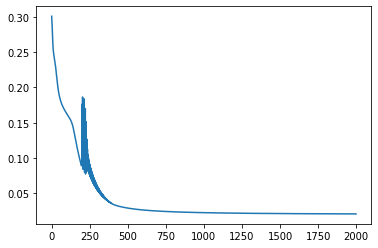

In [ ]:
FF.fit(X_train,y_train,Epochs=2000,lr=.01,display_loss=True)

In [ ]:
y_pred_train=FF.predict(X_train)
Y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()

In [ ]:
accuracy_score(y_train,Y_pred_binarised_train)

0.976

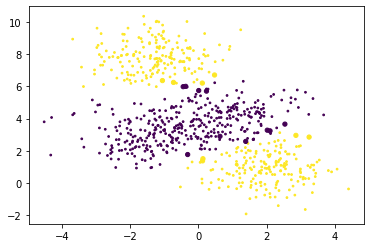

In [ ]:
y_pred_test=FF.predict(X_test)
Y_pred_binarised_test=(y_pred_test>=0.5).astype("int").ravel()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-y_train)+.2))


In [ ]:
accuracy_score(y_test,Y_pred_binarised_test)

0.94

array([0.5626511 , 3.55633252])

## Our FeedForward Network